In [5]:
# Question 1: Condition number and approximation error of matrix A

using LinearAlgebra
using Random
using Plots

Random.seed!(304)

A = randn(5, 5)
b = randn(5, 1)

x_big = inv.(BigFloat.(A)) .* BigFloat.(b)
x_float = inv.(A) .* b

condA = cond(A)
diff = norm(x_big .- x_float) 

println(condA)
println(diff)

29.027395951932498
1.150048389259959349300132965108144474149591920690456045648890990083545934340136e-15


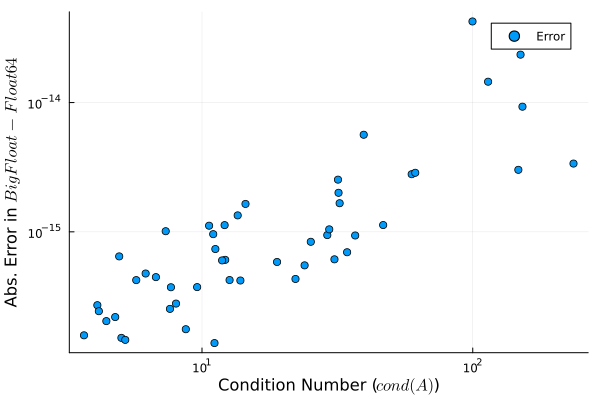

In [9]:
# Question 2: Repeat 1 for 49 more matricies and make a log scatterplot of BigFloat vs Float64

using LinearAlgebra
using Random
using Plots

Random.seed!(304)

A = [randn(5, 5) for _ in 0:49]
b = [randn(5, 1) for _ in 0:49]

x_big = inv.([map(BigFloat, aa) for aa in A]) .* [map(BigFloat, bb) for bb in b]
x_float = inv.(A) .* b

condA = cond.(A)
diff = norm.(x_big .- x_float) 

scatter(condA, diff, xaxis=:log, yaxis=:log, label = "Error")
xlabel!("Condition Number (\$cond(A)\$)")
ylabel!("Abs. Error in \$BigFloat - Float64\$")